# Lab 1 - Priyanka Singh(*824)

https://keras.io/api/datasets/cifar10/ 
https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset:
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck										

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#from tensorflow.python.keras.utils.vis_utils import model_to_dot
#from tensorflow.keras.utils import plot_model

Below code loads the cifar10 dataset. Input shape is 32,32,3 because they're color images of 32X32.

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [3]:
trainX

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
trainX1 = trainX.reshape((trainX.shape[0], 32, 32, 3))

In [5]:
trainX1

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
trainY = to_categorical(trainY)

In [7]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# reshape dataset to have a three(red, green and blue) channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [8]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

Defining model 

In [9]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [10]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)
	# summarize layers
	model.summary()
	# plot graph
	plot_model(model, to_file='convolutional_neural_network.png')
	# save model
	model.save('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))


In [11]:
# entry point, run the test harness
run_test_harness()

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.6557 - accuracy: 0.4005
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2582 - accuracy: 0.5507
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0699 - accuracy: 0.6203
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9333 - accuracy: 0.6738
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8247 - accuracy: 0.7124
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7351 - accuracy: 0.7431
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6593 - accuracy: 0.7684
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5906 - accuracy: 0.7942
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5271 - accuracy: 0.8143
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.47

Model Prediction

In [13]:
# make a prediction for a new image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model


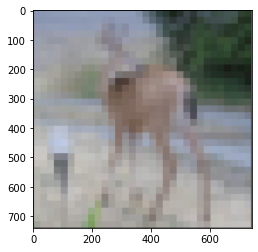

In [14]:
img1 = mpimg.imread('sample.png')
imgplot = plt.imshow(img1)
plt.show()

In [15]:
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, color_mode="rgb", target_size=(32, 32, 3))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 32, 32, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [16]:
img = load_image("sample.png")
model = load_model('final_model.h5')


In [17]:
# predict the class
predict_x=model.predict(img)
result=np.argmax(predict_x,axis=1)
if result[0] == 0:
    print("Airplane")
elif result[0] == 1:
    print("Automobile")
elif result[0] == 2:
    print("Bird")
elif result[0] == 3:
    print("Cat")
elif result[0] == 4:
    print("Deer")
elif result[0] == 5:
    print("Dog")
elif result[0] == 6:
    print("Frog")
elif result[0] == 7:
    print("Horse")
elif result[0] == 8:
    print("Ship")
elif result[0] == 9:
    print("Truck")
else:
    print("Not in the list")

1/1 [==============================] - 1s 506ms/step
Deer
